In [12]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv('SpotifyFeatures.csv')
df["track_name"].fillna("Unknown Track", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8560\204277624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["track_name"].fillna("Unknown Track", inplace=True)


In [ ]:
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [36]:
df["genre"].groupby(df["genre"]).count()

genre
Acapella            119
Alternative        9263
Anime              8936
Blues              9023
Children Music    14756
Classical          9256
Comedy             9681
Country            8664
Dance              8701
Electronic         9377
Folk               9299
Hip-Hop            9295
Indie              9543
Jazz               9441
Movie              7806
Opera              8280
Pop                9386
R&B                8992
Rap                9232
Reggae             8771
Reggaeton          8927
Rock               9272
Ska                8874
Soul               9089
Soundtrack         9646
World              9096
Name: genre, dtype: int64

In [23]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [28]:
df['genre'].replace("Children’s Music","Children's Music",inplace = True)
df['genre'].replace("Children's Music","Children Music", inplace = True)
df['genre'].replace('A Capella','Acapella',inplace = True)

In [54]:
df.drop(labels="track_name",axis=1,inplace=True)

In [37]:
df["genre"].groupby(df["genre"]).count()

genre
Acapella            119
Alternative        9263
Anime              8936
Blues              9023
Children Music    14756
Classical          9256
Comedy             9681
Country            8664
Dance              8701
Electronic         9377
Folk               9299
Hip-Hop            9295
Indie              9543
Jazz               9441
Movie              7806
Opera              8280
Pop                9386
R&B                8992
Rap                9232
Reggae             8771
Reggaeton          8927
Rock               9272
Ska                8874
Soul               9089
Soundtrack         9646
World              9096
Name: genre, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8560\1879740548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


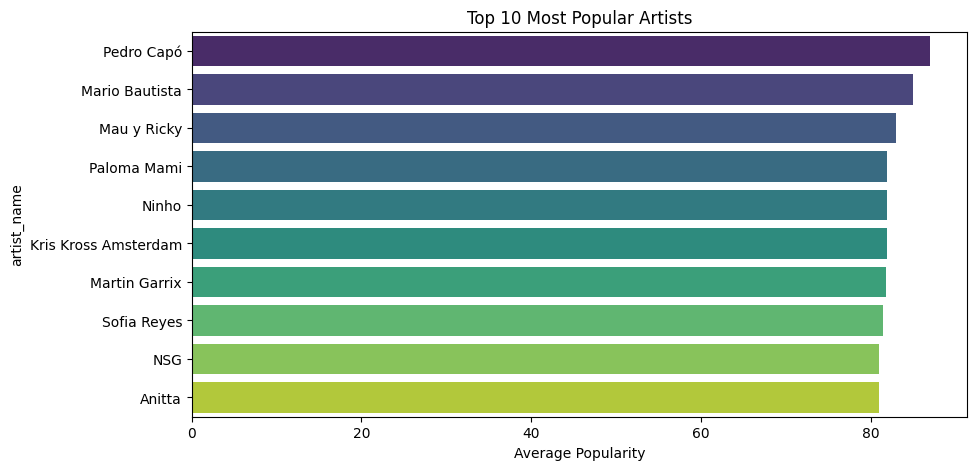

In [ ]:
top_artists = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Most Popular Artists")
plt.xlabel("Average Popularity")
plt.show()  

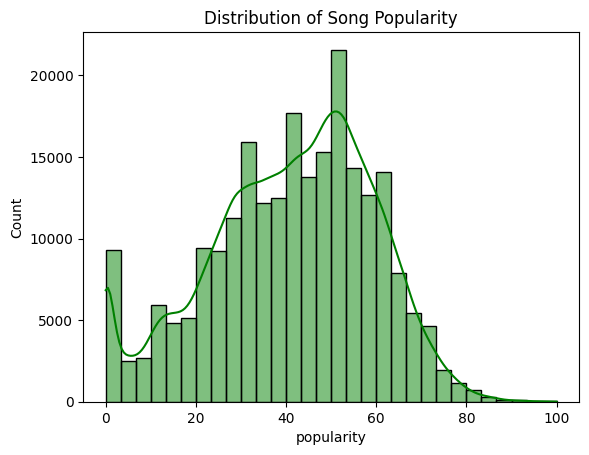

In [41]:
sns.histplot(df['popularity'], bins=30, kde=True, color='green')
plt.title("Distribution of Song Popularity")
plt.show()

In [50]:
char_col = df.select_dtypes(include=['object']).columns


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in char_col:
    df[col] = le.fit_transform(df[col])

In [52]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,14,5181,18348,4210,0,0.61100,0.389,99373,0.910,0.000000,4,0.3460,-1.828,0,0.0525,166.969,3,0.814
1,14,8254,92962,4316,1,0.24600,0.590,137373,0.737,0.000000,9,0.1510,-5.559,1,0.0868,174.003,3,0.816
2,14,6451,32194,4704,3,0.95200,0.663,170267,0.131,0.000000,3,0.1030,-13.879,1,0.0362,99.488,4,0.368
3,14,5181,30998,6102,0,0.70300,0.240,152427,0.326,0.000000,4,0.0985,-12.178,0,0.0395,171.758,3,0.227
4,14,4074,90792,6973,4,0.95000,0.331,82625,0.225,0.123000,8,0.2020,-21.150,0,0.0456,140.576,3,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,23,11433,111439,57522,39,0.00384,0.687,326240,0.714,0.544000,5,0.0845,-10.626,0,0.0316,115.542,3,0.962
232721,23,6508,17957,41835,38,0.03290,0.785,282447,0.683,0.000880,7,0.2370,-6.944,1,0.0337,113.830,3,0.969
232722,23,8914,431,67945,47,0.90100,0.517,166960,0.419,0.000000,5,0.0945,-8.282,0,0.1480,84.135,3,0.813
232723,23,10196,141395,141473,44,0.26200,0.745,222442,0.704,0.000000,0,0.3330,-7.137,0,0.1460,100.031,3,0.489


In [ ]:
x = df.drop()